In [15]:

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
#from resizeimage import resizeimage
import pickle 


In [2]:
#https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
    #accessed 2023_09_02
# Identify Image Resolutions

root = '/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/val/'
# Get the Image Resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs = imgs_jpeg + imgs_jpg + imgs_png
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)


In [3]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 7500


,FileName,Size,Width,Height,Aspect Ratio
0,2839.jpeg,"(176, 320)",176,320,0.55
1,1716.jpeg,"(98, 320)",98,320,0.31
2,723.jpeg,"(320, 185)",320,185,1.73
3,4514.jpeg,"(320, 96)",320,96,3.33
4,6529.jpeg,"(98, 320)",98,320,0.31


Text(0, 0.5, 'Height')

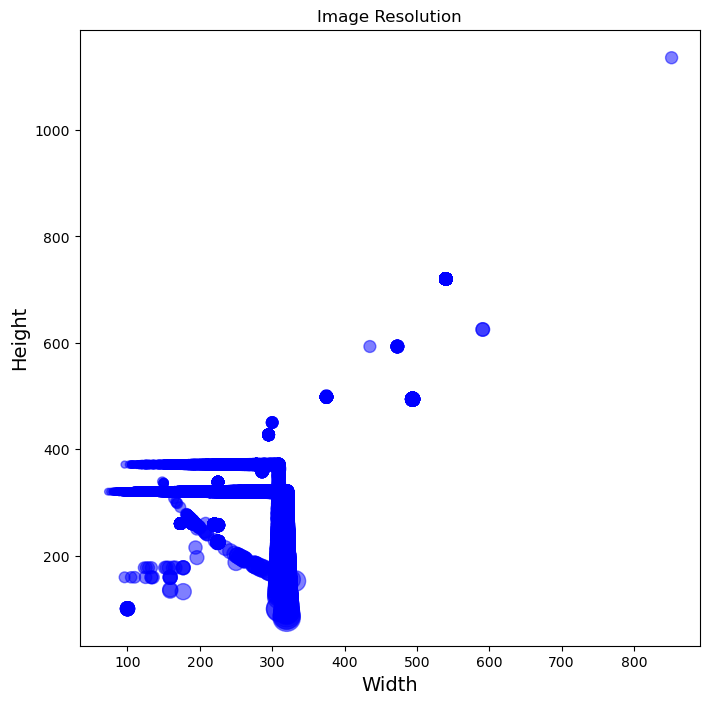

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [5]:
img_meta_df[img_meta_df['Height'] > 1000]

,FileName,Size,Width,Height,Aspect Ratio
5772,3861.jpeg,"(852, 1136)",852,1136,0.75


In [6]:
img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/val/0.jpeg')

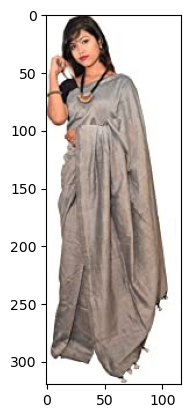

In [7]:
plt.imshow(img)

In [8]:

arrs_val = []
arrs_val_gray = []
not_found = []
for i in range(7500):
    
    try:
        
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/val/{i}.jpeg')
        
        img = img.resize((300,300))
        img = img.convert("RGB")
        
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_300x300/{i}.jpeg')
        #resized_imgs_val.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
       
    except:
        
        not_found.append(i)

In [9]:
len(arrs_val), len(arrs_val_gray), len(not_found)

(7019, 7019, 481)

In [10]:
missing = []
for i in not_found:
    try:
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/val/{i}.jpg')
        img = img.resize((300,300))
        img = img.convert('RGB')
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_64x64/{i}.jpg')
        #resized_imgs_val.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
    except:
        missing.append(i)

In [11]:
len(missing)

3

In [12]:
for i in missing:
    try:
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/val/{i}.png')
        img = img.resize((300,300))
        img = img.convert('RGB')
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/train_resized_32x32/{i}.png')
        #resized_imgs_train.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
    except:
        print(i)

In [13]:
len(arrs_val), len(arrs_val_gray)

(7500, 7500)

In [16]:
with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300', 'wb') as fp:   
    pickle.dump(arrs_val, fp)

OSError: [Errno 28] No space left on device

In [ ]:
with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300_gray', 'wb') as fp:   
    pickle.dump(arrs_val_gray, fp)